<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: Amirreza Velae

STUDENT ID: 400102222

## Import 
>Put all of your imports for this file in the below cell.

In [49]:
### START CODE HERE ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [50]:
### START CODE HERE ###
A = np.array([[10,20,30],[5,10,15],[1,5,8]])

B_Builder = np.array([[15,30,45],[20,35,40],[25,40,55]])
B = np.zeros((3,3,4))
for i in range(4):
    B[:,:,i] = (B_Builder + i*45)
B = B.astype(int)


print(B)
### END CODE HERE ###

[[[ 15  60 105 150]
  [ 30  75 120 165]
  [ 45  90 135 180]]

 [[ 20  65 110 155]
  [ 35  80 125 170]
  [ 40  85 130 175]]

 [[ 25  70 115 160]
  [ 40  85 130 175]
  [ 55 100 145 190]]]


## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [51]:
### START CODE HERE ###
print("B[:,:,3] = \n", B[:,:,2], "\n")
B[:,:,3] = A
print("B[:,:,3] = \n", B[:,:,3], "\n")
### END CODE HERE ###

B[:,:,3] = 
 [[105 120 135]
 [110 125 130]
 [115 130 145]] 

B[:,:,3] = 
 [[10 20 30]
 [ 5 10 15]
 [ 1  5  8]] 



## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [52]:
### START CODE HERE ###
B[:,:,[0,3]] = B[:,:,[3,0]]
print(B)
### END CODE HERE ###

[[[ 10  60 105  15]
  [ 20  75 120  30]
  [ 30  90 135  45]]

 [[  5  65 110  20]
  [ 10  80 125  35]
  [ 15  85 130  40]]

 [[  1  70 115  25]
  [  5  85 130  40]
  [  8 100 145  55]]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [53]:
### START CODE HERE ###
#transpose
for i in range(4):
    B[:,:,i] = B[:,:,i].T
### END CODE HERE ###

## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [54]:
### START CODE HERE ###
C = np.eye(3)
for i in range(4):
    C = np.matmul(C,B[:,:,i])
print(C)
### END CODE HERE ###

[[3.8893500e+07 4.0813625e+07 5.1686750e+07]
 [8.7142500e+07 9.1444375e+07 1.1580625e+08]
 [1.3227300e+08 1.3880275e+08 1.7578150e+08]]


## Determinant
>Calculate the determinant of the array A and print it.

In [63]:
### START CODE HERE ###
det_A = np.linalg.det(A)
print("det_A = ", det_A)
### END CODE HERE ###

det_A =  0.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [56]:
### START CODE HERE ###
data = pd.read_csv('IMDB-Movie-Data.csv')
### END CODE HERE ###

## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [67]:
### START CODE HERE ###
#Get all Actors from the dataset and store it in a list
actors = []
for i in data['Actors']:
    actors.extend(i.split(','))
actors = list(set(actors))
#count the number of movies each actor has acted in
actor_count = []
for i in actors:
    count = 0
    for j in data['Actors']:
        if i in j:
            count += 1
    actor_count.append(count)
#Create a dictionary of actors and their movie count
actor_dict = dict(zip(actors,actor_count))
#Sort the dictionary in descending order of movie count
actor_dict = sorted(actor_dict.items(), key=lambda x: x[1], reverse=True)
#Print the top 10 actors
print(actor_dict[:10])

### END CODE HERE ###

[('Mark Wahlberg', 15), ('Hugh Jackman', 14), ('Christian Bale', 13), ('Brad Pitt', 13), ('Robert Downey Jr.', 12), ('Tom Hardy', 12), ('Scarlett Johansson', 12), ('Michael Fassbender', 12), ('Johnny Depp', 12), ('Channing Tatum', 12)]


## Score Histogram
>Draw the histogram of metascores and ratings. 

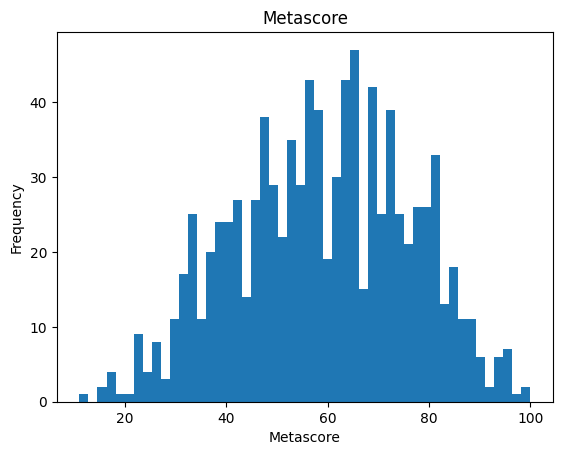

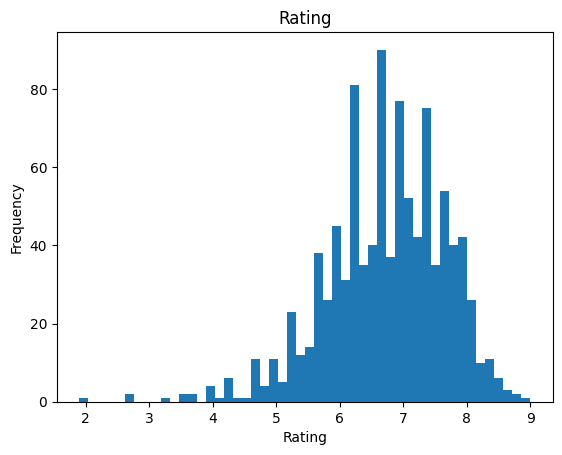

In [58]:
### START CODE HERE ###
#Draw the histogram of metascores and ratings. 
plt.hist(data['Metascore'],bins=50)
plt.title('Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['Rating'],bins=50)
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [64]:
### START CODE HERE ###
print("Correlation between Rating and Metascore = ", data['Rating'].corr(data['Metascore']))
print("Correlation between Rating and Votes = ", data['Rating'].corr(data['Votes']))
print("Correlation between Metascore and Votes = ", data['Metascore'].corr(data['Votes']))
### END CODE HERE ###

Correlation between Rating and Metascore =  0.6318965100387075
Correlation between Rating and Votes =  0.5115373197657554
Correlation between Metascore and Votes =  0.32568380853365664


The correlation between rating and metascore is 0.63 which is a strong positive correlation. This means that the higher the rating, the higher the metascore. The correlation between rating and votes is 0.51 which is a moderate positive correlation. This means that the higher the rating, the higher the votes. The correlation between metascore and votes is 0.32 which is a weak positive correlation. This means that not necessarily the higher the metascore, the higher the votes.So, there is a meaningful relation between rating and metascore and between rating and votes.

# Question 3

## File
> Crate a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [68]:
### START CODE HERE ###
with open('Name_actors.txt','w') as f:
    for i in actors:
        f.write(i.strip()+'\n')
        
### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

<BarContainer object of 11 artists>

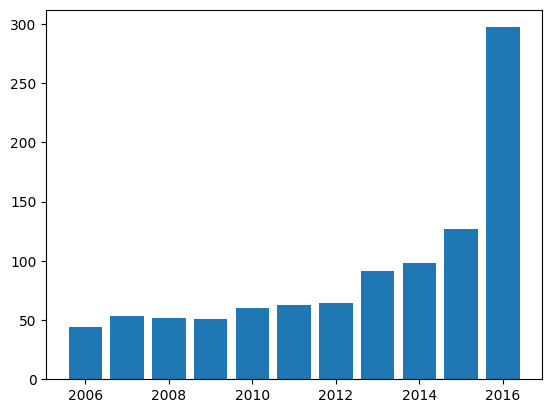

In [69]:
### START CODE HERE ###
#plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
year = []
for i in data['Year']:
    year.append(i)
year = list(set(year))
year_count = []
for i in year:
    count = 0
    for j in data['Year']:
        if i == j:
            count += 1
    year_count.append(count)
plt.bar(year,year_count)
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

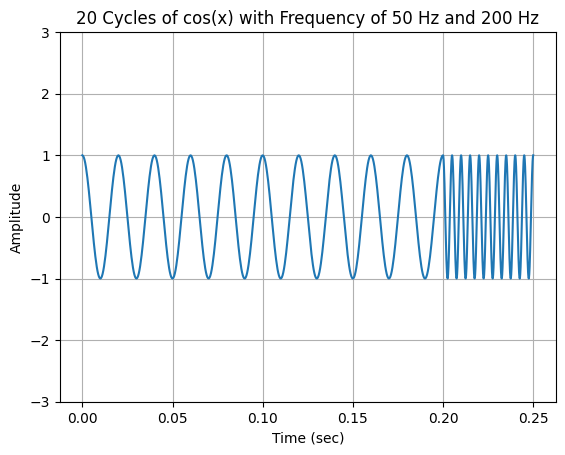

In [89]:
### START CODE HERE ###
t1 = np.linspace(0, 0.2, 500)
t2 = np.linspace(0.2, 0.25, 1000)
t = np.concatenate((t1, t2))     

x = np.cos(2*np.pi*50*t1)        
y = np.cos(2*np.pi*200*t2)       
z = np.concatenate((x, y))     

plt.plot(t, z)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('20 Cycles of cos(x) with Frequency of 50 Hz and 200 Hz')
plt.ylim(-3, 3)
plt.grid()
plt.show()
### END CODE HERE ###